## YFinance API remote data access
### NAB_Bank_Australia
- Price Prediction Modle / Level indentification _ October-03- 2023

In [67]:
import math
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout, Dense, LSTM
import pandas_datareader as pdr
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import scipy as sc 
import numpy as np
import datetime as dt
plt.style.use('fivethirtyeight')
import tensorflow as tf
%matplotlib inline
%matplotlib notebook 
import yfinance as yf 
yf.pdr_override()

In [68]:
# data = pd.read_csv('Tesla_Nasdaq_Prediction.csv')
# data

start = dt.datetime(2013,12,2)
end = dt.datetime.now()

# data = web.DataReader(company, 'yahoo', start)
# company = '^DJI'  #DowJones Industrial
# company = '^AXJO' #AUS200
company = 'NAB.AX' #National Bank of Austrlia (NAB)

from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe using pandas_datareader
data = pdr.get_data_yahoo(company, start, end)
# Check the column names in the DataFrame
print(data.columns)

# Set the index as the existing index column
data.set_index(data.index, inplace=True)

# # Print the modified DataFrame with the index
# print(data)


[*********************100%***********************]  1 of 1 completed
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [69]:
df = yf.download(symbol, start)

[*********************100%***********************]  1 of 1 completed


In [70]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-02,33.076092,33.152195,32.571915,32.638504,18.789309,4121157
2013-12-03,32.676556,32.847786,32.514835,32.524349,18.723595,3847926
2013-12-04,32.343605,32.933399,32.315067,32.705093,18.827642,5182784
2013-12-05,32.533859,32.619476,32.020168,32.020168,18.433346,6683656
2013-12-06,31.839424,31.925041,31.297194,31.839424,18.329292,5573816
...,...,...,...,...,...,...
2023-09-27,28.879999,29.170000,28.799999,29.040001,29.040001,3885408
2023-09-28,28.879999,29.070000,28.775000,28.879999,28.879999,3297403
2023-09-29,29.000000,29.070000,28.809999,29.070000,29.070000,4088277


In [71]:
data['LogReturn'] = np.log(data['Adj Close']).shift(-1) - np.log(data['Adj Close'])

In [72]:
# data["Close"].plot.hist(bins=50, color='blue', edgecolor='black')
# plt.grid(visible= 'yes')
# sigma = data['LogReturn'].std(ddof=1)

<IPython.core.display.Javascript object>


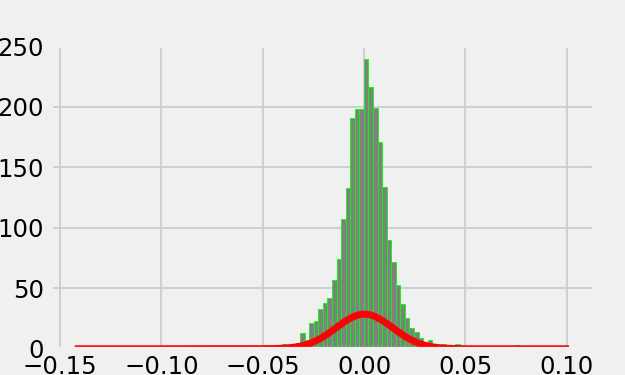

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

mu = data['LogReturn'].mean()
sigma = data['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(data['LogReturn'].min() - 0.01, data['LogReturn'].max() + 0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

plt.figure(figsize=(5, 3))
data['LogReturn'].hist(bins=100, color='grey', edgecolor='lime')
plt.plot(density['x'], density['pdf'], color='red')
plt.show()


In [74]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,LogReturn
count,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2.490000e+03,2489.000000
mean,28.185547,28.372216,27.969623,28.176500,21.819343,6.062755e+06,0.000171
std,4.051170,4.041035,4.062233,4.055422,3.896782,3.473367e+06,0.013971
min,14.270000,14.480000,13.195000,13.880000,11.868550,0.000000e+00,-0.132833
25%,26.280001,26.442501,26.092500,26.250000,18.994532,4.014283e+06,-0.006332
50%,28.510000,28.735000,28.340000,28.530851,21.462469,5.185999e+06,0.000440
75%,30.969999,31.165000,30.735001,30.918743,23.726827,7.026172e+06,0.007270
max,37.756401,37.775429,37.528095,37.642250,31.087421,4.162041e+07,0.092149


In [75]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2023-09-27,28.879999,29.170000,28.799999,29.040001,29.040001,3885408,-0.005525
2023-09-28,28.879999,29.070000,28.775000,28.879999,28.879999,3297403,0.006557
2023-09-29,29.000000,29.070000,28.809999,29.070000,29.070000,4088277,-0.003791
2023-10-02,29.010000,29.100000,28.764999,28.959999,28.959999,2136807,-0.005887
2023-10-03,28.450001,28.860001,28.340000,28.790001,28.790001,5559232,NaN


In [76]:
data.shape
print(data.shape,'Data appeared as it is as appeared in above table data frame, via yahoo finance pd data reader')

(2490, 7) Data appeared as it is as appeared in above table data frame, via yahoo finance pd data reader


### Plotting / visualizing closing price 

<IPython.core.display.Javascript object>


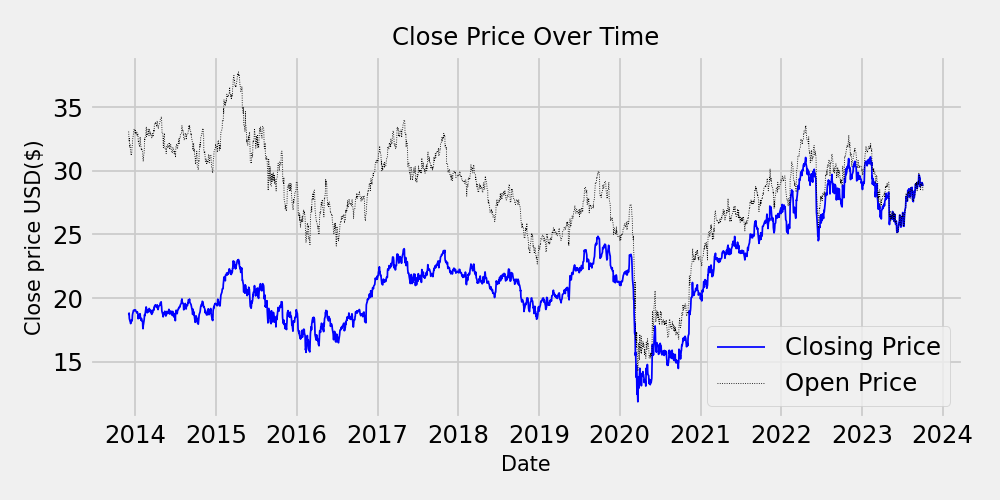

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(data['Adj Close'], color='blue', linewidth=1, label='Closing Price')
plt.plot(data['Open'], color='black', linewidth=0.5, linestyle='dotted', label='Open Price')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close price USD($)', fontsize=12)
plt.title('Close Price Over Time', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

# Creating new data frame with only 'Adj Close' column

In [78]:
asset = data.filter(['Adj Close'])

## Convert the DataFrame to a numpy array


In [79]:
dataset = data.values

In [80]:
asset = asset.filter(['Adj Close'])
### convert the DataFrame to a numpy array

dataset = asset.values

In [89]:
print(asset.values)

[[18.78930855]
 [18.72359467]
 [18.82764244]
 ...
 [29.06999969]
 [28.95999908]
 [28.79000092]]


In [81]:
## Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1992

## Scaling Data

In [82]:
scaler = MinMaxScaler(feature_range= (0,1))
scaled_data = scaler.fit_transform(dataset)

In [83]:
scaled_data

array([[0.36010222],
       [0.35668299],
       [0.36209682],
       ...,
       [0.89502912],
       [0.88930555],
       [0.88046017]])

## Prepare Data for Machine Learning Model 

In [86]:
train_data = scaled_data[0: training_data_len, :]

### Split the Data into x_train and y_train dataset

x_train = []
y_train = []

In [88]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset['Adj Close'].values.reshape(-1,1))

# Now let's defined how many days need to look back to predict the future price 

prediction_days = 252

# creating two empty lists for data training purpose 
for i in range(252, len(train_data)):
    x_train.append(train_data[i-252: i, 0])
    y_train.append(train_data[i, 0])
    
    if i<= 252:
        print(x_train)
        print(y_train)
        print()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices